<a href="https://colab.research.google.com/github/dgx781/Deep-learning/blob/DataScience-Ocean/Cat_and_Dog_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [17]:
x_train= np.loadtxt("/content/mydrive/MyDrive/Dataset/input.csv", delimiter=',')
y_train= np.loadtxt("/content/mydrive/MyDrive/Dataset/labels.csv", delimiter=',')

In [19]:
x_test= np.loadtxt("/content/mydrive/MyDrive/Dataset/input_test.csv", delimiter=',')
y_test= np.loadtxt("/content/mydrive/MyDrive/Dataset/labels_test.csv", delimiter=',')

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2000, 30000), (400, 30000), (2000,), (400,))

In [21]:
len(x_train), len(y_train)

(2000, 2000)

In [22]:
x_train= x_train.reshape(len(x_train), 100,100,3)
y_train= y_train.reshape(len(y_train),1)
x_test= x_test.reshape(len(x_test), 100,100,3)
y_test= y_test.reshape(len(y_test),1)

In [23]:
x_train[1]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [24]:
x_train= x_train/255
x_test= x_test/255

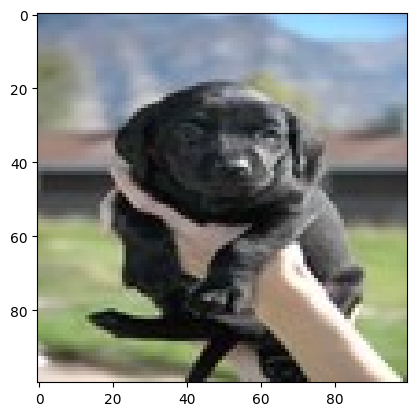

In [27]:
import random
idx= random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])

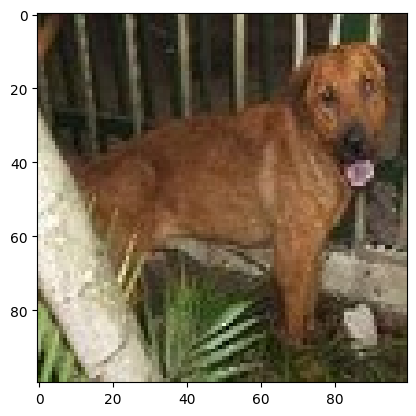

In [28]:
plt.imshow(x_train[0])

In [41]:
model= keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 57s 2s/step - loss: 1.1421 - accuracy: 0.5080
Epoch 2/10
32/32 [==============================] - 57s 2s/step - loss: 0.6820 - accuracy: 0.5595
Epoch 3/10
32/32 [==============================] - 55s 2s/step - loss: 0.6240 - accuracy: 0.6595
Epoch 4/10
32/32 [==============================] - 55s 2s/step - loss: 0.5399 - accuracy: 0.7335
Epoch 5/10
32/32 [==============================] - 55s 2s/step - loss: 0.4361 - accuracy: 0.7960
Epoch 6/10
32/32 [==============================] - 55s 2s/step - loss: 0.3448 - accuracy: 0.8575
Epoch 7/10
32/32 [==============================] - 55s 2s/step - loss: 0.2629 - accuracy: 0.8880
Epoch 8/10
32/32 [==============================] - 52s 2s/step - loss: 0.1971 - accuracy: 0.9220
Epoch 9/10
32/32 [==============================] - 56s 2s/step - loss: 0.1354 - accuracy: 0.9530
Epoch 10/10
32/32 [==============================] - 55s 2s/step - loss: 0.0891 - accuracy: 0.9705


In [42]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 3s 221ms/step - loss: 1.4991 - accuracy: 0.6275


[1.4990785121917725, 0.6274999976158142]

In [32]:
y_test[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [37]:
y_test[2].shape

(1,)

1/1 [==============================] - 0s 63ms/step
Our model says it is: dog


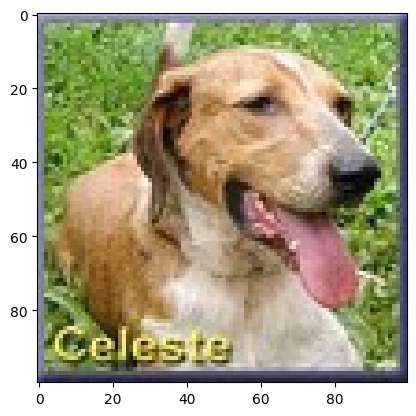

In [51]:
idx= random.randint(0, len(y_test))
plt.imshow(x_test[idx, :])
y_pred= model.predict(x_test[idx,:].reshape(1,100,100,3))

y_pred= np.where(y_pred>0.5, 1,0)

if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is:", pred)

In [46]:
y_pred= model.predict(x_test[idx,:].reshape(1,100,100,3))
print(y_pred)

1/1 [==============================] - 0s 208ms/step
[[0.00436411]]
